# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import itertools 
import string
string.punctuation
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import re

c:\users\chanc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Extracting both the dataset

In [2]:
df_train=pd.read_csv('drugComTrain_raw.csv')
df_test=pd.read_csv('drugComTest_raw.csv')

In [3]:
#Please try to analyze dataset and create a classification model for rating variable.

# Analyzing data

Concatenating both the dataset for analysis

In [4]:
df=pd.concat([df_train, df_test])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [6]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [17]:
df.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

As more null values are there in condition column we can state , Many people are not aware of their condition name.

In [36]:
print("Starting Date :", df['date'].min())
print("Ending Date :", df['date'].max())

Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


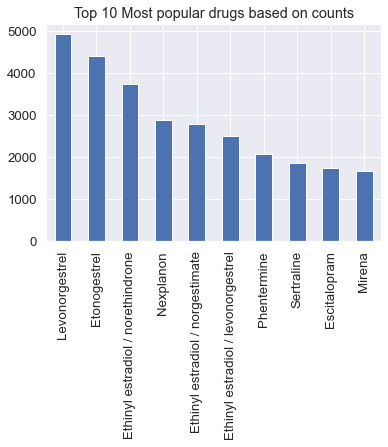

In [19]:
df['drugName'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most popular drugs based on counts")
plt.show()

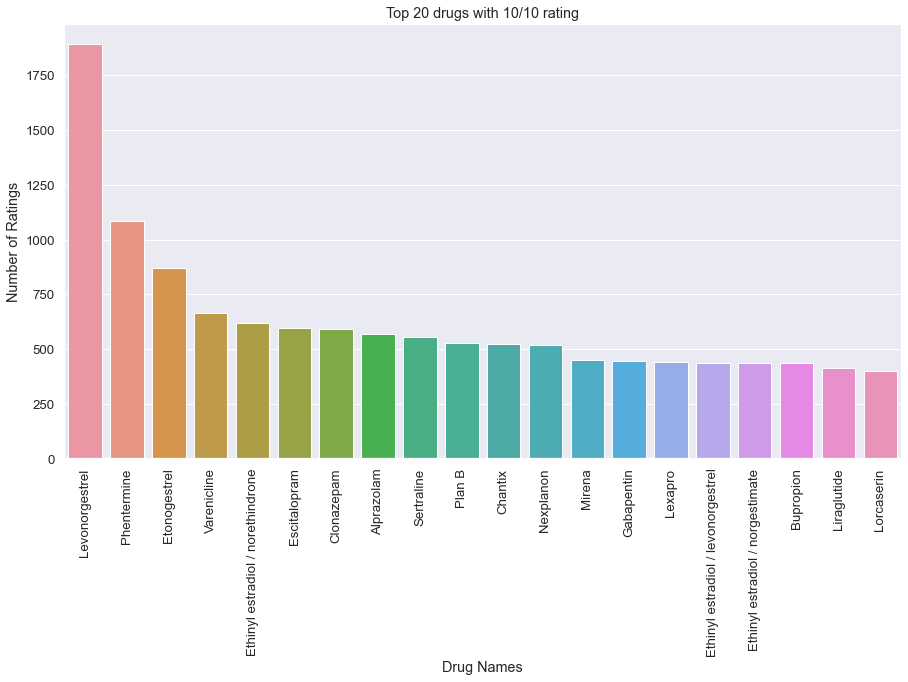

In [20]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [10]:
df['rating'].value_counts()

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

c:\users\chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Rating')

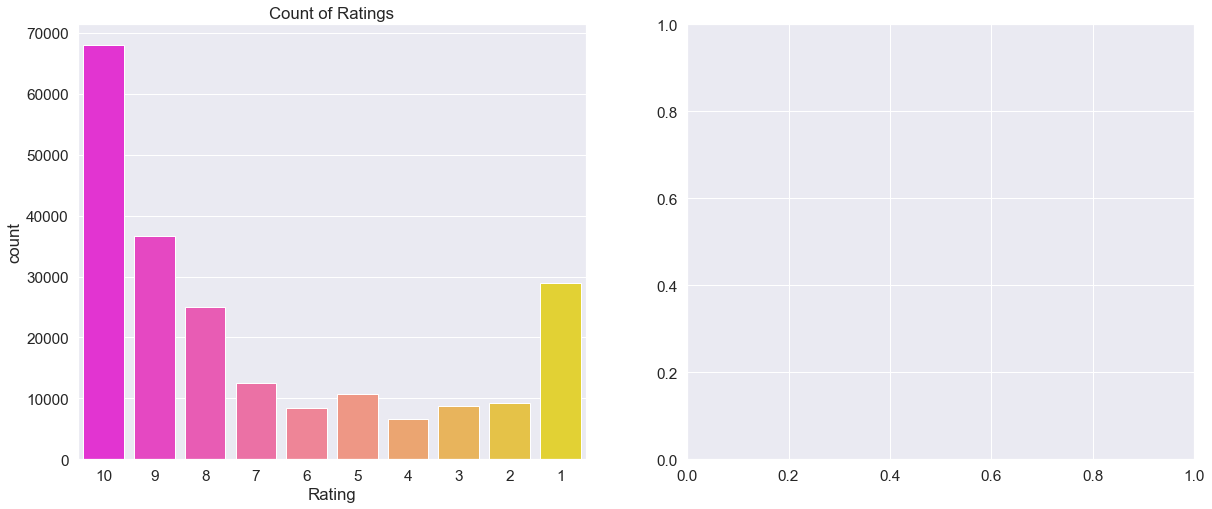

In [23]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])

sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")



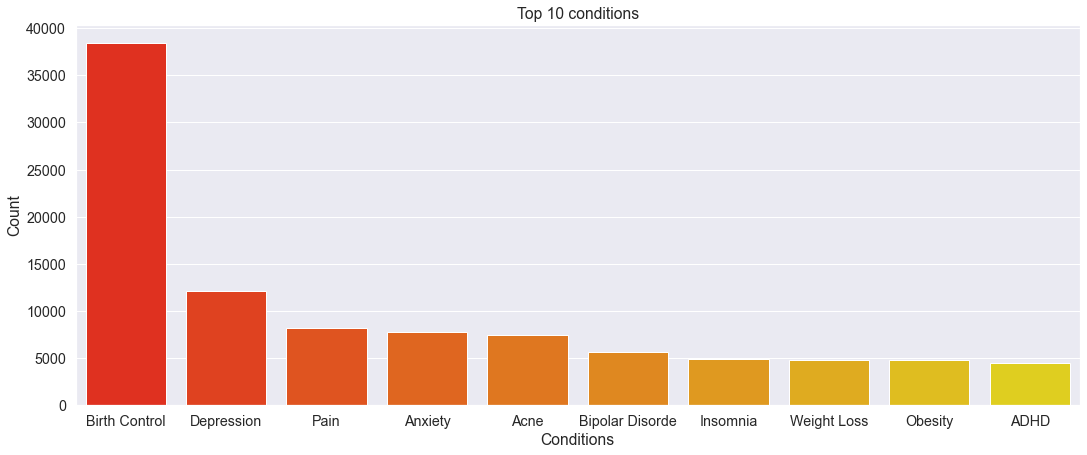

In [27]:
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'autumn')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

In [43]:

top_100_reviews=df["usefulCount"].sort_values(ascending=False)[:100]
top_100_reviews_df=df.loc[top_100_reviews.index, :]

Text(0.5, 0, 'condition')

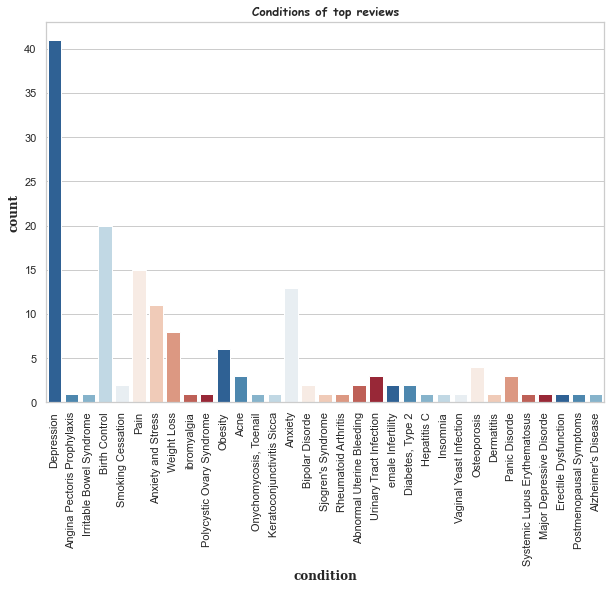

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="condition", data=top_100_reviews_df, palette=sns.color_palette("RdBu_r", 10))
plt.xticks(rotation=90)
plt.title("Conditions of top reviews", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("condition", {"fontname": "serif", "fontweight":"bold"})

In [30]:
df['condition'].value_counts().nlargest(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

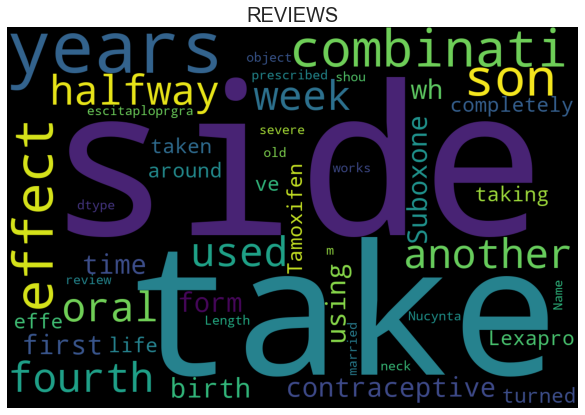

In [38]:

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'Black', stopwords = stopwords, width = 1200, height = 800).generate(str(df['review']))

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

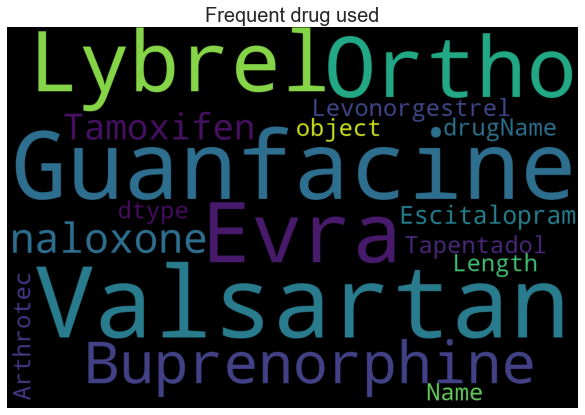

In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'Black', stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Frequent drug used', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [41]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# now extracting year from date
df['Year'] = df['date'].dt.year



c:\users\chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


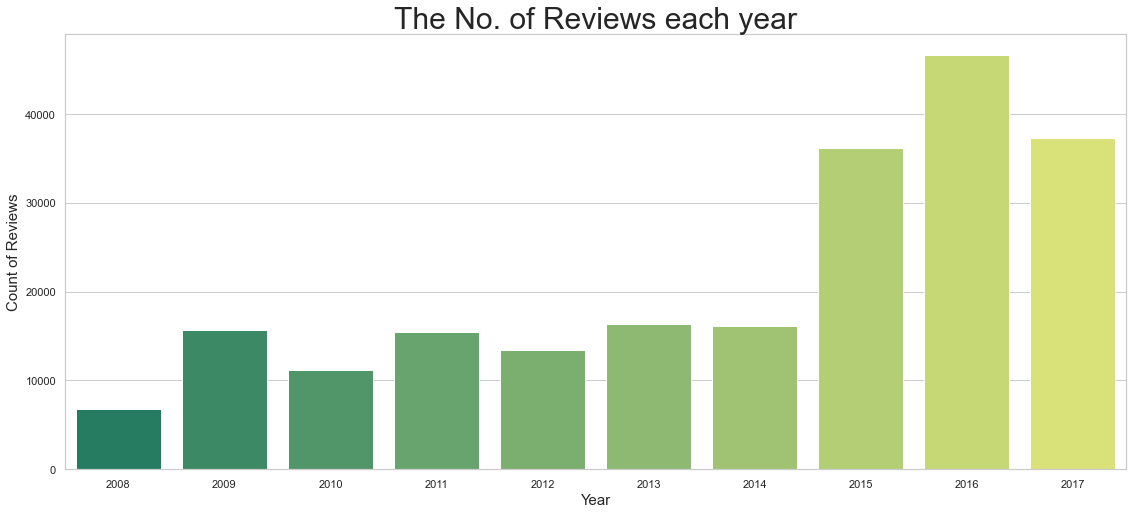

In [50]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(df['Year'], palette ='summer')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

# Data preprocessing

classification of rating based on review

In [44]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


Using training csv data for training and testing csv data for testing

Dropping the features which we wont be considering for classification

In [3]:
X=df_train.drop(['uniqueID','drugName','rating','date','usefulCount','condition'],axis=1)
test=df_test.drop(['uniqueID','drugName','rating','date','usefulCount','condition'],axis=1)

In [4]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
X['review']= X['review'].apply(lambda x:remove_punctuation(x))
X.head()

,review
0,It has no side effect I take it in combination...
1,My son is halfway through his fourth week of I...
2,I used to take another oral contraceptive whic...
3,This is my first time using any form of birth ...
4,Suboxone has completely turned my life around ...


In [5]:
X['review']= X['review'].apply(lambda x: x.lower())

In [6]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()

<IPython.core.display.Javascript object>

In [7]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stopwords]
    # 6. lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmatize_words))

In [8]:
X['review'] = X['review'].apply(review_to_words)

In [9]:
X

,review
0,side effect take combination bystolic mg fish oil
1,son halfway fourth week intuniv became concern...
2,used take another oral contraceptive pill cycl...
3,first time using form birth control glad went ...
4,suboxone completely turned life around feel he...
...,...
161292,wrote first report midoctober alcohol since po...
161293,given iv surgey immediately became anxious cou...
161294,limited improvement month developed bad rash m...
161295,thyroid medication year spent first synthroid ...


Applying preprocessing steps to testing dataset also 

In [54]:
test['review']= test['review'].apply(lambda x:remove_punctuation(x))
test['review']= test['review'].apply(lambda x: x.lower())

test['review'] = test['review'].apply(review_to_words)

In [56]:
test

,review
0,tried antidepressant year citalopram fluoxetin...
1,son crohn disease done well asacol complaint s...
2,quick reduction symptom
3,contrave combine drug used alcohol smoking opi...
4,birth control one cycle reading review type si...
...,...
53761,taken tamoxifen year side effect severe sweati...
53762,taking lexapro escitaploprgram since february ...
53763,married year old kid taking pill hassle decide...
53764,prescribed nucynta severe neckshoulder pain ta...


Saving Rating class as Y

In [57]:
Y=df_train['rating']

Converting data to tf-idf form

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X['review'])


In [60]:
X_train_counts

<161297x65874 sparse matrix of type '<class 'numpy.int64'>'
	with 5620178 stored elements in Compressed Sparse Row format>

In [59]:
X_test_counts = count_vector.transform(test['review'])

In [61]:
X_test_counts

<53766x65874 sparse matrix of type '<class 'numpy.int64'>'
	with 1862925 stored elements in Compressed Sparse Row format>

In [62]:
# TF-IDF vectorize.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [63]:
X_train_tfidf

<161297x65874 sparse matrix of type '<class 'numpy.float64'>'
	with 5620178 stored elements in Compressed Sparse Row format>

In [64]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [65]:
X_test_tfidf

<53766x65874 sparse matrix of type '<class 'numpy.float64'>'
	with 1862925 stored elements in Compressed Sparse Row format>

# Applying naive bayes for classification

In [66]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, Y)

In [67]:
X_train_tfidf

<161297x65874 sparse matrix of type '<class 'numpy.float64'>'
	with 5620178 stored elements in Compressed Sparse Row format>

In [68]:
X_test_tfidf

<53766x65874 sparse matrix of type '<class 'numpy.float64'>'
	with 1862925 stored elements in Compressed Sparse Row format>

In [69]:
predicted = clf.predict(X_test_tfidf)

In [75]:
unique_numbers = list(set(predicted))
print(unique_numbers)

[1, 5, 7, 8, 9, 10]


In [73]:
y_test=df_test['rating']

In [74]:
from sklearn import metrics
metrics.accuracy_score(y_test, predicted)

0.3462411189227393

In [76]:
test[predicted > y_test]


,review
1,son crohn disease done well asacol complaint s...
2,quick reduction symptom
3,contrave combine drug used alcohol smoking opi...
4,birth control one cycle reading review type si...
5,day first week using arm face put vaseline lip...
...,...
53760,started taking apri month ago breats got notic...
53762,taking lexapro escitaploprgram since february ...
53763,married year old kid taking pill hassle decide...
53764,prescribed nucynta severe neckshoulder pain ta...
